# Bayesian Changepoint Detection with multivariate data in Python

This code computes the probability of changepoints (including changes in correlation) in a time series. In this notebook I show how you can use it. This example is modified from Xiang Xuan's thesis Section 3.2.

First let's generate some data and load some modules:

In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import bayesian_changepoint_detection.generate_data as gd
import seaborn

%matplotlib inline
%load_ext autoreload
%autoreload 2

partition, data = gd.generate_xuan_motivating_example(200,500)

Let's plot this data:

In [7]:
data.shape

(967, 2)

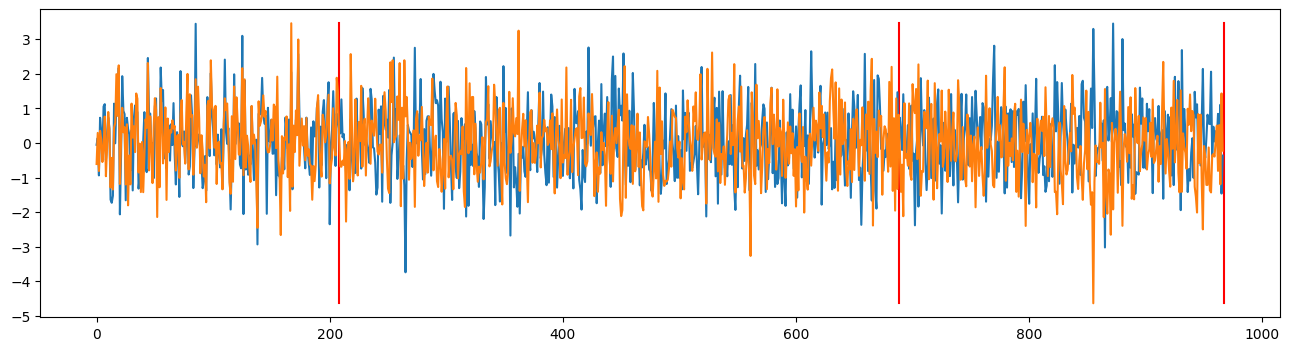

In [2]:
import numpy as np
changes = np.cumsum(partition)

fig, ax = plt.subplots(figsize=[16, 4])
for p in changes:
    ax.plot([p,p],[np.min(data),np.max(data)],'r')
for d in range(2):
    ax.plot(data[:,d])

Let's try to detect the changes with independent features:

In [3]:
from bayesian_changepoint_detection.priors import const_prior
from bayesian_changepoint_detection.offline_likelihoods import IndepentFeaturesLikelihood
from bayesian_changepoint_detection.bayesian_models import offline_changepoint_detection
from functools import partial

Q_ifm, P_ifm, Pcp_ifm = offline_changepoint_detection(
    data, partial(const_prior, p=1/(len(data) + 1)), IndepentFeaturesLikelihood(), truncate=-20
)

Use scipy logsumexp().


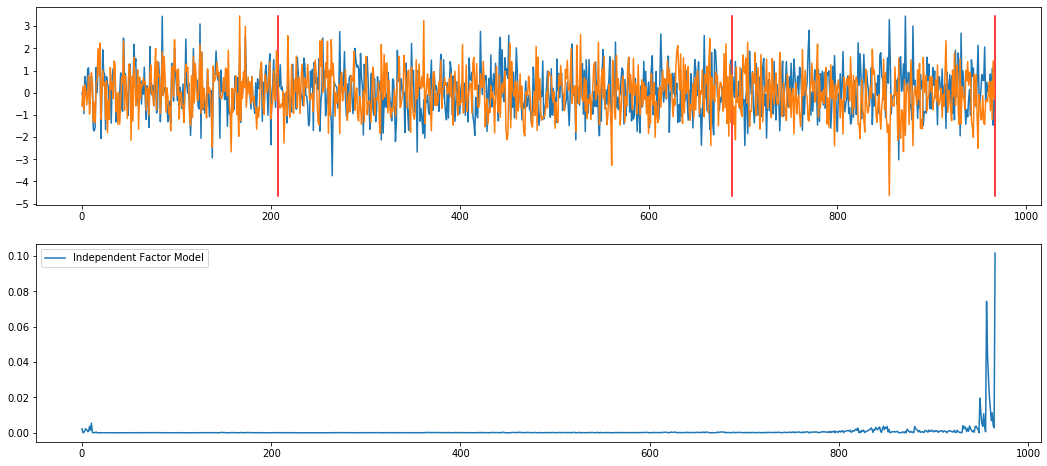

In [4]:
fig, ax = plt.subplots(2, figsize=[18, 8])
for p in changes:
    ax[0].plot([p,p],[np.min(data),np.max(data)],'r')
for d in range(2):
    ax[0].plot(data[:,d])
plt.legend(['Raw data with Original Changepoints'])
ax[1].plot(np.exp(Pcp_ifm).sum(0))
plt.legend(['Independent Factor Model'])
plt.show()

Unfortunately, not very good... Now let's try the full covariance model (warning, it'll take a while):

In [6]:
from bayesian_changepoint_detection.offline_likelihoods import FullCovarianceLikelihood
Q_full, P_full, Pcp_full = offline_changepoint_detection(
    data, partial(const_prior, p=1/(len(data)+1)), FullCovarianceLikelihood(), truncate=-20
)

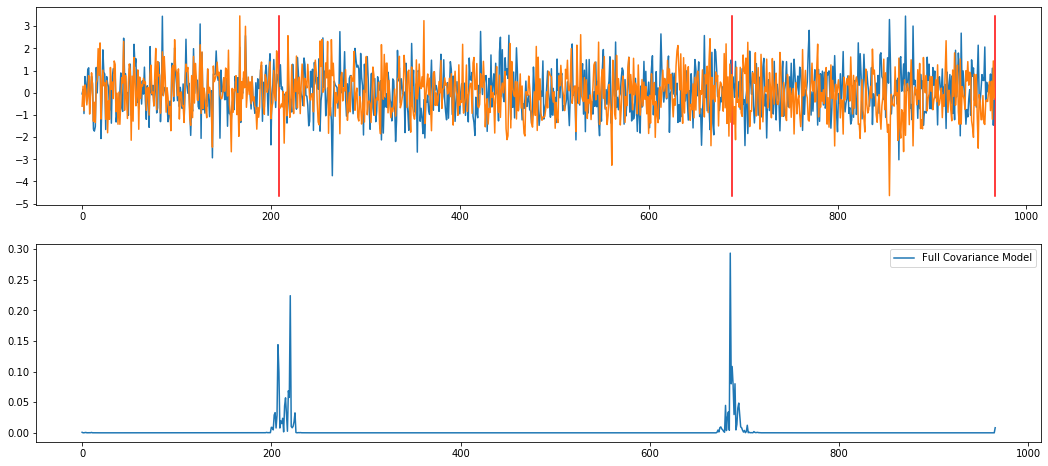

In [7]:
fig, ax = plt.subplots(2, figsize=[18, 8])
for p in changes:
    ax[0].plot([p,p],[np.min(data),np.max(data)],'r')
for d in range(2):
    ax[0].plot(data[:,d])
plt.legend(['Raw data with Original Changepoints'])
ax[1].plot(np.exp(Pcp_full).sum(0))
plt.legend(['Full Covariance Model'])
plt.show()

Ahh, much better now!

In [11]:
%timeit Q_ifm, P_ifm, Pcp_ifm = offline_changepoint_detection(data, partial(const_prior, p=1/(len(data)+1)), IndepentFeaturesLikelihood(), truncate=-20)

59.5 s ± 2.82 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
